In [1]:
import numpy as np
from numpy.linalg import inv
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and dataset

In [2]:
X, y = load_svmlight_file(f="housing_scale.txt", n_features=13)

X = X.toarray()
n_samples, n_features = X.shape

print(n_samples, n_features)

506 13


# Hyper-paramters

In [3]:
TEST_SIZE = 0.25
ROUND = 20

# Devide the dataset into traning set and validation set

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

# Closed-form solution for linear regression

## Regularized loss function

$$ L(w) = \frac{\lambda}{2}{\left|\left|w\right|\right|}^2 + \frac{1}{2}{\left|\left|y - Xw\right|\right|}^2 $$

## Vectorized loss function

$$ L(w) = \frac{\lambda}{2}\hat{w}^T\hat{w} + \frac{1}{2}(y - X\hat{w})^T(y-X\hat{w}) $$

## Partial derivative

$$ \frac{\partial L(w)}{\partial w} = \lambda w - X^T y + X^T X w = 0 $$

$$ \Rightarrow w = (X^T X + \lambda I)^{-1} X^T y $$

## Identity matrix $I$

In [5]:
iden = np.identity(n_features)

## Predict and compute the RMSE loss for different penalty factor $\lambda$

### Loss

$$ Loss = RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y\_pred^{(i)} - y\_true^{(i)})^2} $$

In [6]:
losses_train, losses_val = [], []

for round in range(ROUND):
    penalty = round / 10
    iden = np.identity(n_features)

    w = inv((X_train.T @ X_train + penalty * iden)) @ X_train.T @ y_train  # compute parameter w

    y_pred = np.dot(X_train, w)
    loss_train = np.sqrt(((y_pred - y_train) ** 2).mean())
    losses_train.append(loss_train)

    y_pred = np.dot(X_val, w)
    loss_val = np.sqrt(((y_pred - y_val) ** 2).mean())
    losses_val.append(loss_val)
    
    print('Round {:0>2d}\tPenalty: {}\tLoss_train: {:.4f}\tLoss_val: {:.4f}'.format(
        round + 1, float(penalty), losses_train[-1], losses_val[-1]))

Round 01	Penalty: 0.0	Loss_train: 5.0781	Loss_val: 4.5580
Round 02	Penalty: 0.1	Loss_train: 5.0782	Loss_val: 4.5558
Round 03	Penalty: 0.2	Loss_train: 5.0783	Loss_val: 4.5538
Round 04	Penalty: 0.3	Loss_train: 5.0785	Loss_val: 4.5520
Round 05	Penalty: 0.4	Loss_train: 5.0788	Loss_val: 4.5502
Round 06	Penalty: 0.5	Loss_train: 5.0791	Loss_val: 4.5487
Round 07	Penalty: 0.6	Loss_train: 5.0796	Loss_val: 4.5472
Round 08	Penalty: 0.7	Loss_train: 5.0800	Loss_val: 4.5459
Round 09	Penalty: 0.8	Loss_train: 5.0806	Loss_val: 4.5447
Round 10	Penalty: 0.9	Loss_train: 5.0812	Loss_val: 4.5436
Round 11	Penalty: 1.0	Loss_train: 5.0819	Loss_val: 4.5426
Round 12	Penalty: 1.1	Loss_train: 5.0826	Loss_val: 4.5417
Round 13	Penalty: 1.2	Loss_train: 5.0834	Loss_val: 4.5409
Round 14	Penalty: 1.3	Loss_train: 5.0843	Loss_val: 4.5402
Round 15	Penalty: 1.4	Loss_train: 5.0851	Loss_val: 4.5397
Round 16	Penalty: 1.5	Loss_train: 5.0861	Loss_val: 4.5392
Round 17	Penalty: 1.6	Loss_train: 5.0871	Loss_val: 4.5388
Round 18	Penal

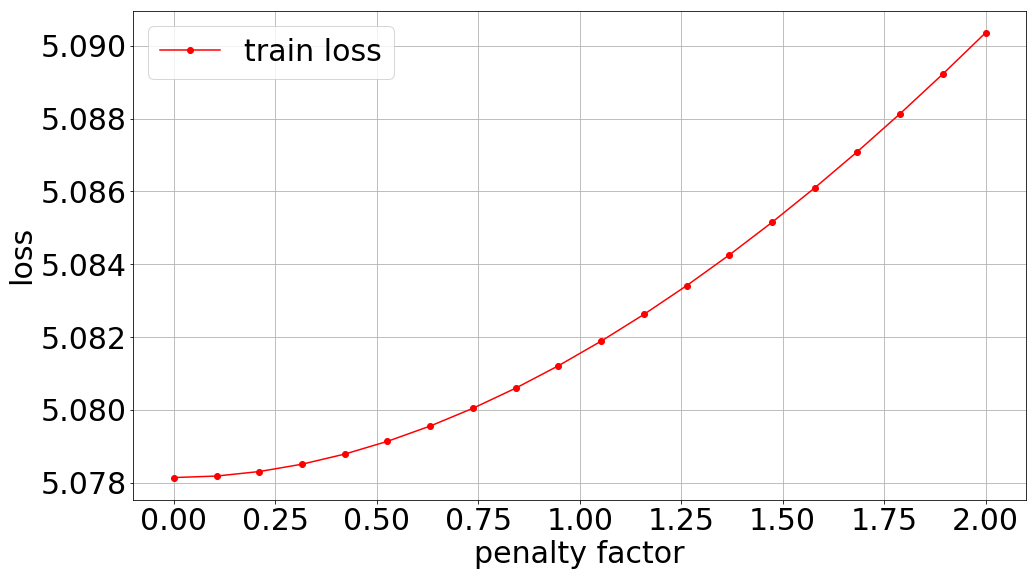

In [7]:
ftsize=30
plt.figure(figsize=(16, 9))
x = np.linspace(0, 2, 20)
plt.xticks(fontsize=ftsize)
plt.yticks(fontsize=ftsize)
plt.plot(x, losses_train, "-", marker="o", color="r", label="train loss")
# plt.plot(x, losses_val, "-", marker="*", color="b", label="validation loss")
plt.xlabel("penalty factor", fontsize=ftsize)
plt.ylabel("loss", fontsize=ftsize)
plt.legend(fontsize=ftsize)
# plt.title("The training loss graph of closed-form solution", fontsize='xx-large')
plt.grid()
# plt.savefig("cf_loss_train.png")
plt.show()

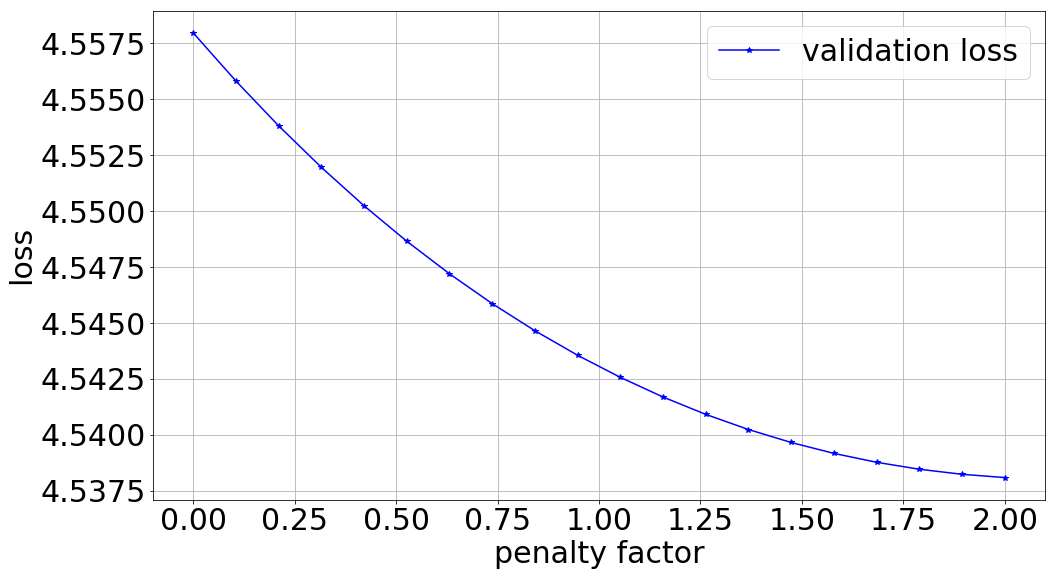

In [8]:
plt.figure(figsize=(16, 9))
x = np.linspace(0, 2, 20)
plt.xticks(fontsize=ftsize)
plt.yticks(fontsize=ftsize)
# plt.plot(x, losses_train, "-", marker="o", color="r", label="train loss")
plt.plot(x, losses_val, "-", marker="*", color="b", label="validation loss")
plt.xlabel("penalty factor", fontsize=ftsize)
plt.ylabel("loss", fontsize=ftsize)
plt.legend(fontsize=ftsize)
# plt.title("The validation loss graph of closed-form solution", fontsize='xx-large')
plt.grid()
# plt.savefig("cf_loss_val.png")
plt.show()